# NFL Big Data Bowl 2024

In [1]:
#importing package

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
playerDf = pd.read_csv('./dataset/players.csv')

In [3]:
playerDf

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
...,...,...,...,...,...,...,...
1678,55200,6-6,266,NaN,Indiana,DT,Ryder Anderson
1679,55212,6-0,230,NaN,Iowa State,ILB,Jake Hummel
1680,55239,6-2,300,NaN,Pennsylvania,DT,Prince Emili
1681,55240,6-1,185,NaN,Buffalo,CB,Ja'Marcus Ingram


In [4]:
playerDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1683 non-null   int64 
 1   height       1683 non-null   object
 2   weight       1683 non-null   int64 
 3   birthDate    1204 non-null   object
 4   collegeName  1683 non-null   object
 5   position     1683 non-null   object
 6   displayName  1683 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.2+ KB


In [5]:
column_null_sum = {k: v for k, v in zip(playerDf.columns, [playerDf[x].isna().sum() for x in playerDf.columns])}
column_null_sum

{'nflId': 0,
 'height': 0,
 'weight': 0,
 'birthDate': 479,
 'collegeName': 0,
 'position': 0,
 'displayName': 0}

In [6]:
playerDf.dropna(inplace=True)

In [7]:
PREPROCESSING_MODULE_FILE = "data_preprocessing/players_preprocessing.py"

In [8]:
%%writefile {PREPROCESSING_MODULE_FILE}

import pandas as pd

def height_preprocess(height_series) -> pd.Series:
    def parse_height(height_str):
        # Split the height string into individual components
        feet, inches = map(int, height_str.split('-'))
        
        # Convert feet and inches to centimeters
        cm = feet * 30.48 + inches * 2.54
        
        return cm

    # Apply the parse_height function to each element in the Series
    cm_height_series = height_series.apply(parse_height)
    
    return cm_height_series

def age_preprocess(birthdate_series, reference_year=2023) -> pd.Series:
    # Convert the birthdate strings to datetime objects, handling different formats
    birthdates = pd.to_datetime(birthdate_series, errors='coerce')

    # Calculate the age based on the specified reference year
    ages = (pd.to_datetime(reference_year, format='%Y') - birthdates) // pd.Timedelta(days=365.25)

    return ages

Overwriting data_preprocessing/players_preprocessing.py


In [9]:
from data_preprocessing import players_preprocessing

height_series = playerDf['height']
birtdate_series = playerDf['birthDate']

playerDf['height'] = players_preprocessing.height_preprocess(height_series)
playerDf['age'] = players_preprocessing.age_preprocess(birtdate_series)

<Figure size 1800x1400 with 0 Axes>

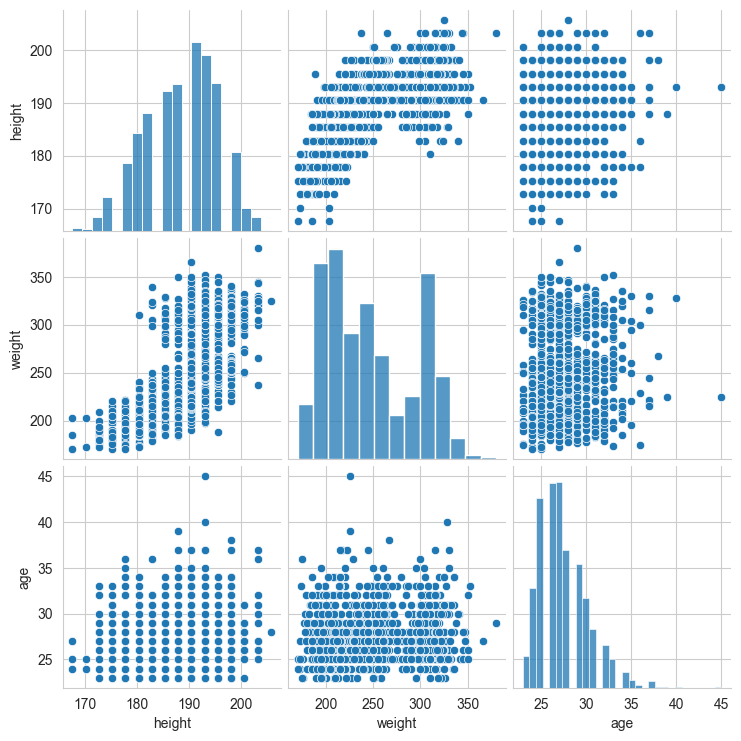

In [10]:
sns.set_style('whitegrid')

plt.figure(figsize=(18,14))
sns.pairplot(playerDf.drop('nflId',axis=1))

<Axes: >

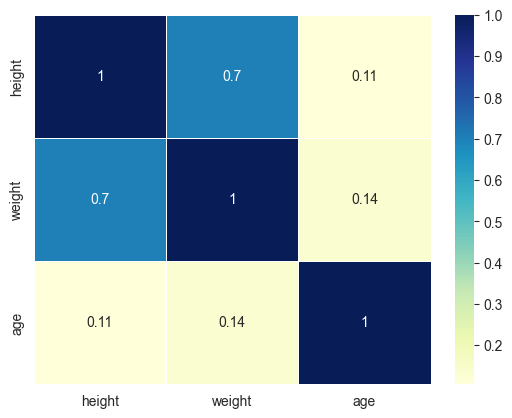

In [11]:
sns.heatmap(playerDf.drop(['nflId','birthDate','collegeName','position','displayName'],axis=1).corr(), xticklabels=playerDf.drop(['nflId','birthDate','collegeName','position','displayName'],axis=1).columns,
            yticklabels=playerDf.drop(['nflId','birthDate','collegeName','position','displayName'],axis=1).columns, linewidths=.5, cmap='YlGnBu', annot=True)

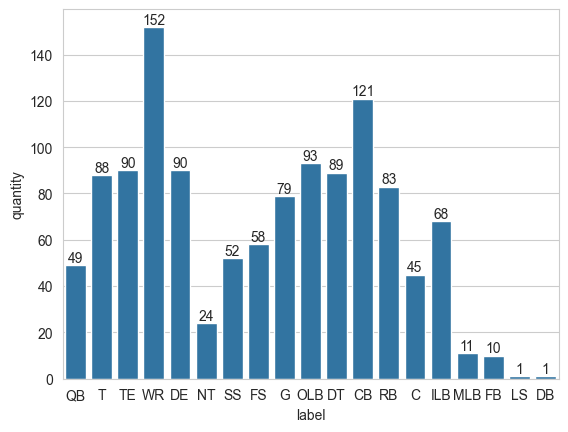

In [43]:
cat_player_position_list = []

for value in playerDf.position.unique():
    json_buffer = {
        'label' : value,
        'quantity' : len(playerDf[playerDf['position'] == value]['position'])
    }

    cat_player_position_list.append(json_buffer)

cat_player_position_list

player_position_qty_df = pd.DataFrame(cat_player_position_list)

ax = sns.barplot(player_position_qty_df, x="label", y="quantity", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);